<img src="https://github.com/pathakchiranjit/Time_Series/blob/main/Pics/aqi1.jpg?raw=true" align='left'><br/>

### **The time-series project based on AQI data in Indian cities**

<img src="https://github.com/pathakchiranjit/Time_Series/blob/main/Pics/aqi5.gif?raw=true" align='left'><br/>























**Data Source:**

https://www.kaggle.com/rohanrao/air-quality-data-in-india


### An air quality index is used by government agencies to communicate to the public how polluted the air currently is or how polluted it is forecast to become. Public health risks increase as the AQI rises. Different countries have their own air quality indices, corresponding to different national air quality standards.

<img src="https://github.com/pathakchiranjit/Time_Series/blob/main/Pics/aqi3.gif?raw=true" align='left'><br/>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Tools: Importing Packages](#section2)<br>
3. [Collecting & Loading Data](#section3)<br>
  - 3.1 [Importing Data sets & Description](#section301)<br>
  - 3.2 [Data Preparation](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [City wise AQI data analysis](#section501)<br>
  - 5.2 [AQI data analysis before and after COVID-19](#section502)<br>
  - 5.3 [AQI distribution for Delhi](#section503)<br>
6. [Time Series analysis and forecasting on AQI for delhi](#section6)
  - 6.1 [Trend,Seasonality study:](#section601)
  - 6.2 [Decomposition of time series:](#section602)
  - 6.3 [Stationarity check for source data:](#section603)
  - 6.4 [Base model using differencing methods:](#section604)
  - 6.5 [Model using SARIMAX methods:](#section605)
  - 6.6 [Prediction on validation set:](#section606)
  - 6.7 [Forecasting for next 100 days:](#section607)
  - 6.8 [Analysis of the forecasted data vs actual data (recorded separately):](#section608)
  - 6.9 [Modeling with ARIMA algorithm:](#section609)
	  - 6.9.1 [Auto Regressive Model:](#section6091)
	  - 6.9.2 [Moving Average Model:](#section6092)
	  - 6.9.3 [Auto Regressive Integrated Moving Average Model:](#section6093)
7. [Conclusion](#section7)

##Context:
Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being.

<img src="https://github.com/pathakchiranjit/Time_Series/blob/main/Pics/aqi4.jpg?raw=true" align='left'><br/>

## Content:
The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.

## AQI:
A tutorial of how AQI is calculated is available here: https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index

<img src="https://github.com/pathakchiranjit/Time_Series/blob/main/Pics/aqi2.png?raw=true" align='left'><br/>


## Cities from which measurement data taken:
Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru, Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, Visakhapatnam

## Acknowledgements:
The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India. They also have a real-time monitoring app: https://app.cpcbccr.com/AQI_India/

<a id=section1></a>
## 1. Problem Statement

Based on **AQI of some cities** in **India**, **how COVID-19 has influenced** the **air quality** and how it can be **forcasted** post COVID-19 using **time series modeling technique**?


<a id=section2></a>
## 2. Tools: Importing Packages

In [1]:
%%time
!pip install -q datascience 
!pip install -q --upgrade statsmodels 
#!pip install statsmodels --pgrade

     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 9.5MB 5.5MB/s 
CPU times: user 63.3 ms, sys: 17 ms, total: 80.3 ms
Wall time: 14.5 s


In [2]:
%%time
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
from datetime import datetime                                       # Importing datetime for datetime manipulation
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from statsmodels.tsa.seasonal import seasonal_decompose             # Seasonal decomposition using moving averages
from statsmodels.tsa.stattools import adfuller                      # Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import acf, pacf                     # Importing Autocorrelation and Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf                  # To plot Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_pacf                 # To plot Partial Autocorrelation Function
#-------------------------------------------------------------------------------------------------------------------------------
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore") 
#-----------------------------------------
import itertools
import statsmodels.api as sm
#import pmdarima as pm

CPU times: user 767 ms, sys: 329 ms, total: 1.1 s
Wall time: 1.5 s


In [3]:
#!pip install -U matplotlib

In [4]:
#!pip install pandas-profiling --upgrade

In [5]:
'''
import pandas_profiling 
from pandas_profiling import ProfileReport
#from pandas_profiling.utils.cache import cache_file
'''

'\nimport pandas_profiling \nfrom pandas_profiling import ProfileReport\n#from pandas_profiling.utils.cache import cache_file\n'

In [6]:
#pandas_profiling.__version__

In [7]:
#!pip install -U plotly

<a id=section3></a>
## 3. Collecting & Loading Data

<a id=section301></a>
### 3.1 Importing Data sets & Description

### Importing 1st Dataset

In [8]:
file1="https://raw.githubusercontent.com/pathakchiranjit/Time_Series/main/Data_set/city_day.csv"
city_day = pd.read_csv(file1)  # (encoding='ISO-8859-1',sep="|") not required here
city_day.head(3)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,nan,nan,0.92000,18.22000,17.15000,nan,0.92000,27.64000,133.36000,0.00000,0.02000,0.00000,nan,NaN
1,Ahmedabad,2015-01-02,nan,nan,0.97000,15.69000,16.46000,nan,0.97000,24.55000,34.06000,3.68000,5.50000,3.77000,nan,NaN
2,Ahmedabad,2015-01-03,nan,nan,17.40000,19.30000,29.70000,nan,17.40000,29.07000,30.70000,6.80000,16.40000,2.25000,nan,NaN


<a id=section301></a>
### Description of the Dataset

- This dataset provides a **city wise detail** of **daily AQI parameters from January, 2015 to June, 2020** in **India**, including **other quality parameters**.

### Importing 2nd Dataset

In [9]:
file2="https://raw.githubusercontent.com/pathakchiranjit/Time_Series/main/Data_set/station_day.csv"
df2 = pd.read_csv(file2)  # (encoding='ISO-8859-1',sep="|") not required here
df2.head(3)

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36000,115.75000,1.75000,20.65000,12.40000,12.19000,0.10000,10.76000,109.26000,0.17000,5.92000,0.10000,nan,NaN
1,AP001,2017-11-25,81.40000,124.50000,1.44000,20.50000,12.08000,10.72000,0.12000,15.24000,127.09000,0.20000,6.50000,0.06000,184.00000,Moderate
2,AP001,2017-11-26,78.32000,129.06000,1.26000,26.00000,14.85000,10.28000,0.14000,26.96000,117.44000,0.22000,7.95000,0.08000,197.00000,Moderate


<a id=section301></a>
### Description of the Dataset

- This dataset provides a **station number wise details** of **daily AQI parameters** including **other quality parameters**.

### Importing 3rd Dataset

In [10]:
file3="https://raw.githubusercontent.com/pathakchiranjit/Time_Series/main/Data_set/stations.csv"
stations = pd.read_csv(file3)  # (encoding='ISO-8859-1',sep="|") not required here
stations.head(3)

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN


<a id=section301></a>
### Description of the Dataset

- This dataset provides a **station number details** including **State and City details**.

<a id=section302></a>
### 3.2 Data Preparation

<a id=section301></a>
### Missing data identification

- This is done to identify the data sets, on which Pandas profiling must be done.

In [11]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [12]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.00000,18391.00000,25949.00000,25946.00000,25346.00000,19203.00000,27472.00000,25677.00000,25509.00000,23908.00000,21490.00000,11422.00000,24850.00000
mean,67.45058,118.12710,17.57473,28.56066,32.30912,23.48348,2.24860,14.53198,34.49143,3.28084,8.70097,3.07013,166.46358
std,64.66145,90.60511,22.78585,24.47475,31.64601,25.68427,6.96288,18.13377,21.69493,15.81114,19.96916,6.32325,140.69659
min,0.04000,0.01000,0.02000,0.01000,0.00000,0.01000,0.00000,0.01000,0.01000,0.00000,0.00000,0.00000,13.00000
25%,28.82000,56.25500,5.63000,11.75000,12.82000,8.58000,0.51000,5.67000,18.86000,0.12000,0.60000,0.14000,81.00000
50%,48.57000,95.68000,9.89000,21.69000,23.52000,15.85000,0.89000,9.16000,30.84000,1.07000,2.97000,0.98000,118.00000
75%,80.59000,149.74500,19.95000,37.62000,40.12750,30.02000,1.45000,15.22000,45.57000,3.08000,9.15000,3.35000,208.00000
max,949.99000,1000.00000,390.68000,362.21000,467.63000,352.89000,175.81000,193.86000,257.73000,455.03000,454.85000,170.37000,2049.00000


In [13]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(city_day)

,Total,Percent
Xylene,18109,61.32200
PM10,11140,37.72307
NH3,10328,34.97342
Toluene,8041,27.22901
Benzene,5623,19.04101
AQI_Bucket,4681,15.85114
AQI,4681,15.85114
PM2.5,4598,15.57008
NOx,4185,14.17155
O3,4022,13.61959


<a id=section301></a>
### Comments

- There are missing values present. 

In [14]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(stations)

,Total,Percent
Status,97,42.17391
State,0,0.00000
City,0,0.00000
StationName,0,0.00000
StationId,0,0.00000


<a id=section301></a>
### Comments

- We will only use the data from active stations.

In [15]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df2)

,Total,Percent
Xylene,85137,78.80502
NH3,48105,44.52724
PM10,42706,39.52978
Toluene,38702,35.82358
Benzene,31455,29.11556
O3,25568,23.66640
SO2,25204,23.32948
PM2.5,21625,20.01666
AQI_Bucket,21010,19.44740
AQI,21010,19.44740


<a id=section301></a>
### Comments

- There are missing values present.

<a id=section4></a>
## 4. Data Processing

<a id=section401></a>
### 4.1 Data Preprocessing

In [16]:
city_day['Date'] = pd.to_datetime(city_day['Date'])

In [17]:
# Interpolate using the linear method
city_day.interpolate(limit_direction="both",inplace=True)
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24000,141.54000,0.92000,18.22000,17.15000,26.64000,0.92000,27.64000,133.36000,0.00000,0.02000,0.00000,209.00000,NaN
1,Ahmedabad,2015-01-02,73.24000,141.54000,0.97000,15.69000,16.46000,26.64000,0.97000,24.55000,34.06000,3.68000,5.50000,3.77000,209.00000,NaN
2,Ahmedabad,2015-01-03,73.24000,141.54000,17.40000,19.30000,29.70000,26.64000,17.40000,29.07000,30.70000,6.80000,16.40000,2.25000,209.00000,NaN
3,Ahmedabad,2015-01-04,73.24000,141.54000,1.70000,18.48000,17.97000,26.64000,1.70000,18.59000,36.08000,4.43000,10.14000,1.00000,209.00000,NaN
4,Ahmedabad,2015-01-05,73.24000,141.54000,22.10000,21.42000,37.76000,26.64000,22.10000,39.33000,39.31000,7.01000,18.89000,2.78000,209.00000,NaN


In [18]:
# insert missing values in the AOI bucket column using the above table
def get_remark(aqi_val):
    if 0<=aqi_val<=50:
        return 'Good'
    if 51<=aqi_val<=100:
        return 'Satisfactory'
    if 101<=aqi_val<=200:
        return 'Moderate'
    if 201<=aqi_val<=300:
        return 'Poor'
    if 301<=aqi_val<=400:
        return 'Very Poor'
    if 401<=aqi_val<=500:
        return 'Severe'
    else:
        return 'Severe'
    
city_day['AQI_Bucket'] = city_day['AQI'].map(get_remark)

In [19]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(city_day)

,Total,Percent
AQI_Bucket,0,0.00000
AQI,0,0.00000
Xylene,0,0.00000
Toluene,0,0.00000
Benzene,0,0.00000
O3,0,0.00000
SO2,0,0.00000
CO,0,0.00000
NH3,0,0.00000
NOx,0,0.00000


<a id=section5></a>
## 5. Exploratory Data Analysis

<a id=section501></a>
### 5.1 **City wise AQI data analysis** 

In [20]:
city_day.tail(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02000,50.94000,7.68000,25.06000,19.54000,12.47000,0.47000,8.55000,23.30000,2.24000,12.07000,0.73000,41.00000,Good
29527,Visakhapatnam,2020-06-28,24.38000,74.09000,3.42000,26.06000,16.53000,11.99000,0.52000,12.72000,30.14000,0.74000,2.21000,0.38000,70.00000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91000,65.73000,3.45000,29.53000,18.33000,10.71000,0.48000,8.42000,30.96000,0.01000,0.01000,0.00000,68.00000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64000,49.97000,4.05000,29.26000,18.80000,10.03000,0.52000,9.84000,28.30000,0.00000,0.00000,0.00000,54.00000,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00000,66.00000,0.40000,26.85000,14.05000,5.20000,0.59000,2.10000,17.05000,0.00000,0.00000,0.00000,50.00000,Good


In [21]:
# cities in the dataset
cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

# cities with active stations
stations_cities = stations[stations['Status'] == 'Active']['City'].value_counts()
print(f'Total number of cities with active stations in the dataset : {len(stations_cities)}')
print(stations_cities.index)

Total number of cities in the dataset : 26
Index(['Ahmedabad', 'Delhi', 'Mumbai', 'Chennai', 'Bengaluru', 'Lucknow',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam', 'Aizawl'],
      dtype='object')
Total number of cities with active stations in the dataset : 46
Index(['Delhi', 'Bengaluru', 'Mumbai', 'Kolkata', 'Patna', 'Hyderabad',
       'Gurugram', 'Chennai', 'Faridabad', 'Lucknow', 'Jaipur',
       'Thiruvananthapuram', 'Bahadurgarh', 'Kaithal', 'Jind', 'Aizawl',
       'Ahmedabad', 'Coimbatore', 'Chandigarh', 'Visakhapatnam', 'Ballabgarh',
       'Karnal', 'Manesar', 'Panchkula', 'Mandikhera', 'Yamuna Nagar',
       'Sonipat', 'Shillong', 'Bhopal', 'Bhiwani', 'Hisar', 'Rohtak',
       'Fatehabad', 'Kurukshetra', 'Panipat', 'Ambala', 'Dharuhera',
       'Amaravat

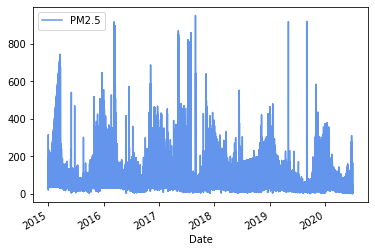

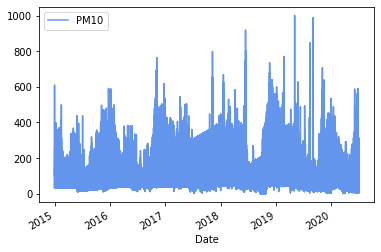

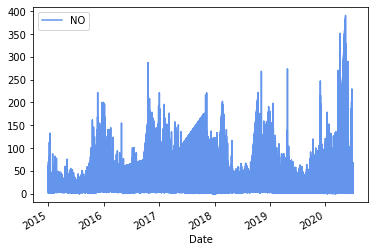

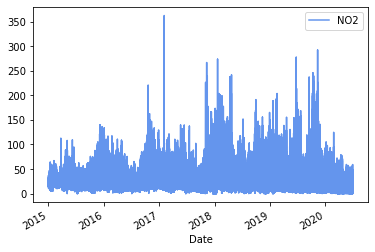

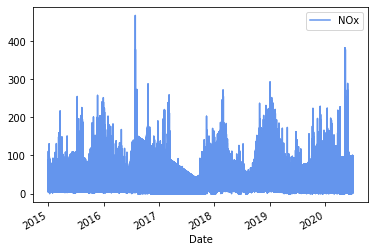

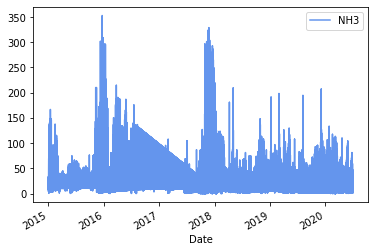

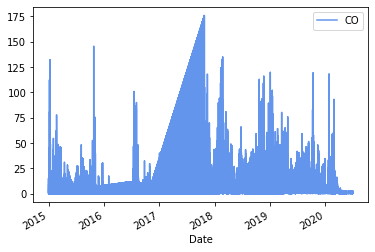

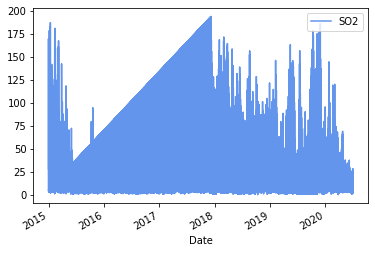

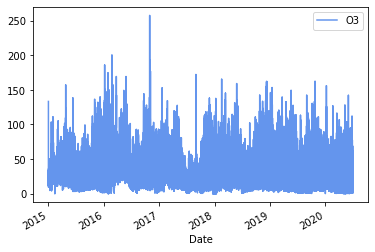

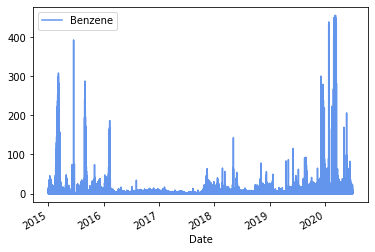

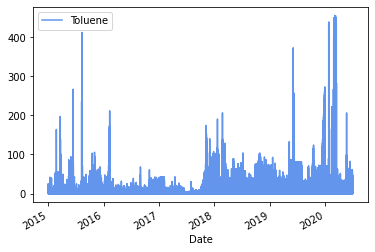

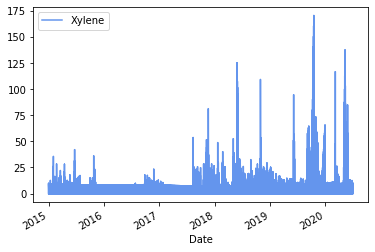

In [22]:
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
for pollutant in pollutants:
    city_day.plot.line(x='Date',y=pollutant,color='cornflowerblue')

([<matplotlib.axis.XTick at 0x7efda63eced0>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

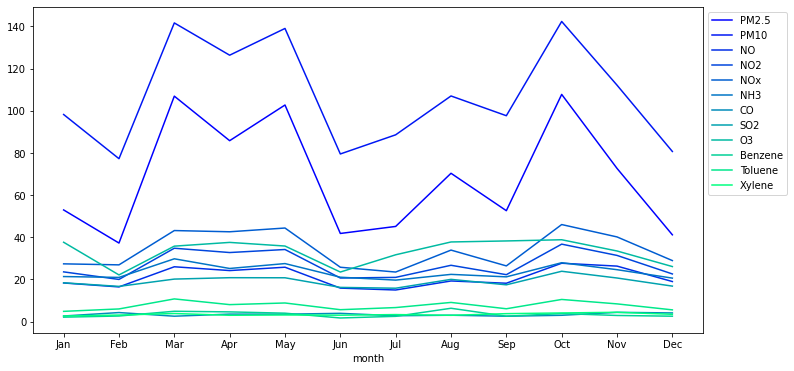

In [23]:
city_day['month'] = pd.DatetimeIndex(city_day['Date']).month
mth_dic = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
city_day['month']=city_day['month'].map(mth_dic)
city_day.groupby('month')[pollutants].mean().plot(figsize=(12,6), cmap='winter')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(np.arange(12), mth_dic.values())

In [24]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai', 'Kolkata']
filter_city_date = city_day[city_day['Date'] >= '2019-01-01']
AQI = filter_city_date[filter_city_date.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

,Date,City,AQI,AQI_Bucket
1461,2019-01-01,Ahmedabad,1474.00000,Severe
1462,2019-01-02,Ahmedabad,1246.00000,Severe
1463,2019-01-03,Ahmedabad,1719.00000,Severe
1464,2019-01-04,Ahmedabad,1264.00000,Severe
1465,2019-01-05,Ahmedabad,1127.00000,Severe


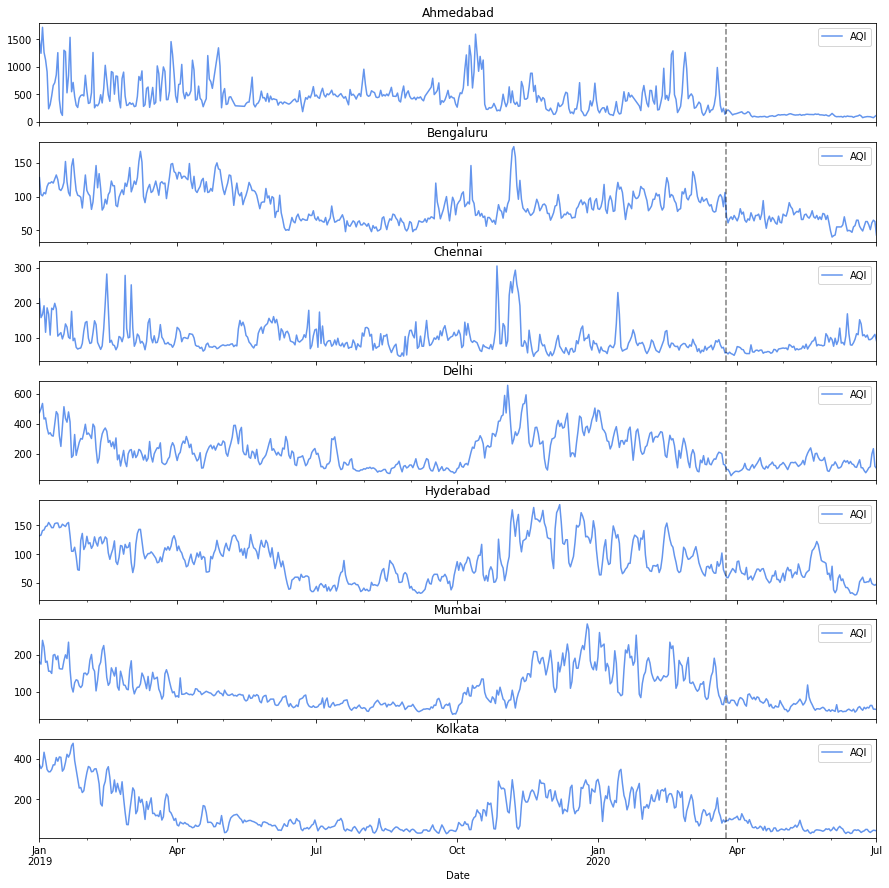

In [25]:
import datetime
import matplotlib.dates as mdates
subplot_titles=["Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai','Kolkata']
x_line_annotation = datetime.date(2020, 3, 25)
f, axes = plt.subplots(7, 1, figsize=(15, 15), sharex=True)
for count, title in enumerate(subplot_titles):
    ax = AQI[AQI['City']==title].plot(x='Date', y='AQI', kind='line', ax=axes[count], color='cornflowerblue')
    ax.title.set_text(title)
    ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 7, 1)])
    ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.5, color='black')

In [26]:
AQI.head(5)

,Date,City,AQI,AQI_Bucket
1461,2019-01-01,Ahmedabad,1474.00000,Severe
1462,2019-01-02,Ahmedabad,1246.00000,Severe
1463,2019-01-03,Ahmedabad,1719.00000,Severe
1464,2019-01-04,Ahmedabad,1264.00000,Severe
1465,2019-01-05,Ahmedabad,1127.00000,Severe


In [27]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.head()

City,Ahmedabad,Bengaluru,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
Date,,,,,,,
2019-01-01,1474.00000,128.00000,212.00000,475.00000,132.00000,370.00000,181.00000
2019-01-02,1246.00000,103.00000,158.00000,501.00000,133.00000,351.00000,175.00000
2019-01-03,1719.00000,101.00000,167.00000,537.00000,141.00000,363.00000,239.00000
2019-01-04,1264.00000,106.00000,192.00000,432.00000,142.00000,431.00000,221.00000
2019-01-05,1127.00000,104.00000,116.00000,440.00000,148.00000,391.00000,180.00000


<a id=section501></a>
### 5.2 **AQI data analysis before and after COVID-19** 

In [28]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-07-01']
AQI_beforelockdown = pd.DataFrame(AQI_beforeLockdown.mean()).reset_index()
AQI_beforelockdown.columns=['City','AQI_avg']
AQI_afterlockdown = pd.DataFrame(AQI_afterLockdown.mean()).reset_index()
AQI_afterlockdown.columns=['City','AQI_avg']
#AQI_beforelockdown.head(5)
AQI_afterlockdown.head(5)

,City,AQI_avg
0,Ahmedabad,119.01020
1,Bengaluru,65.57143
2,Chennai,80.19388
3,Delhi,125.61224
4,Hyderabad,64.07143


In [29]:
cityname={'City':['Kolkata','Delhi','Mumbai','Chennai','Bengaluru','Hyderabad','Ahmedabad'],
         'Longitude':[88.3639,77.2090,72.8777,80.2707,77.5946,78.4867,72.5714],
         'Latitude':[22.5726,28.6139,19.0760,13.0827,12.9716,17.3850,23.0225]}
ct_nm=pd.DataFrame.from_dict(cityname)
ct_nm

,City,Longitude,Latitude
0,Kolkata,88.36390,22.57260
1,Delhi,77.20900,28.61390
2,Mumbai,72.87770,19.07600
3,Chennai,80.27070,13.08270
4,Bengaluru,77.59460,12.97160
5,Hyderabad,78.48670,17.38500
6,Ahmedabad,72.57140,23.02250


In [30]:
AQI_beforelockdown_ct=pd.merge(AQI_beforelockdown,ct_nm,how='left',on='City')
AQI_beforelockdown_ct

,City,AQI_avg,Longitude,Latitude
0,Ahmedabad,392.41176,72.57140,23.02250
1,Bengaluru,96.02353,77.59460,12.97160
2,Chennai,80.31765,80.27070,13.08270
3,Delhi,246.30588,77.20900,28.61390
4,Hyderabad,94.43529,78.48670,17.38500
5,Kolkata,184.09412,88.36390,22.57260
6,Mumbai,148.77647,72.87770,19.07600


In [31]:
AQI_afterlockdown_ct=pd.merge(AQI_afterlockdown,ct_nm,how='left',on='City')
AQI_afterlockdown_ct

,City,AQI_avg,Longitude,Latitude
0,Ahmedabad,119.01020,72.57140,23.02250
1,Bengaluru,65.57143,77.59460,12.97160
2,Chennai,80.19388,80.27070,13.08270
3,Delhi,125.61224,77.20900,28.61390
4,Hyderabad,64.07143,78.48670,17.38500
5,Kolkata,59.35714,88.36390,22.57260
6,Mumbai,64.35714,72.87770,19.07600


In [32]:
#from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
#import chart_studio.plotly as py
#from plotly import tools
#init_notebook_mode(connected=True)

In [33]:
data = [go.Scattergeo(lon=AQI_beforelockdown_ct['Longitude'], 
                              lat=AQI_beforelockdown_ct['Latitude'], 
                              text=AQI_beforelockdown_ct['AQI_avg'], name='',
                              marker=dict(size=AQI_beforelockdown_ct['AQI_avg']/10, color='Blue'))]

In [34]:
layout = go.Layout(title=go.layout.Title(text='Average AQI'), showlegend=False,
                   geo=go.layout.Geo(resolution=110, scope='asia', showframe=False, showcoastlines=True,
                                     landcolor="rgb(229, 229, 229)", countrycolor="white", coastlinecolor="purple"))

In [35]:
fig = go.Figure(data=data, layout=layout)

In [36]:
fig.add_trace(go.Scattergeo(lon=[81.8463], lat=[25.4358], text=['India'], mode='text', showlegend=False, geo='geo'))

In [37]:
data = [go.Scattergeo(lon=AQI_afterlockdown_ct['Longitude'], 
                              lat=AQI_afterlockdown_ct['Latitude'], 
                              text=AQI_afterlockdown_ct['AQI_avg'], name='',
                              marker=dict(size=AQI_afterlockdown_ct['AQI_avg']/10, color='Red'))]

In [38]:
layout = go.Layout(title=go.layout.Title(text='Average AQI'), showlegend=False,
                   geo=go.layout.Geo(resolution=110, scope='asia', showframe=False, showcoastlines=True,
                                     landcolor="rgb(229, 229, 229)", countrycolor="white", coastlinecolor="purple"))

In [39]:
fig = go.Figure(data=data, layout=layout)

In [40]:
fig.add_trace(go.Scattergeo(lon=[81.8463], lat=[25.4358], text=['India'], mode='text', showlegend=False, geo='geo'))

<a id=section501></a>
### 5.3 **AQI distribution for Delhi** 

In [41]:
AQI_dl = city_day[city_day.City =='Delhi'][['Date','AQI']]
AQI_dl.head()

,Date,AQI
10229,2015-01-01,472.00000
10230,2015-01-02,454.00000
10231,2015-01-03,143.00000
10232,2015-01-04,319.00000
10233,2015-01-05,325.00000


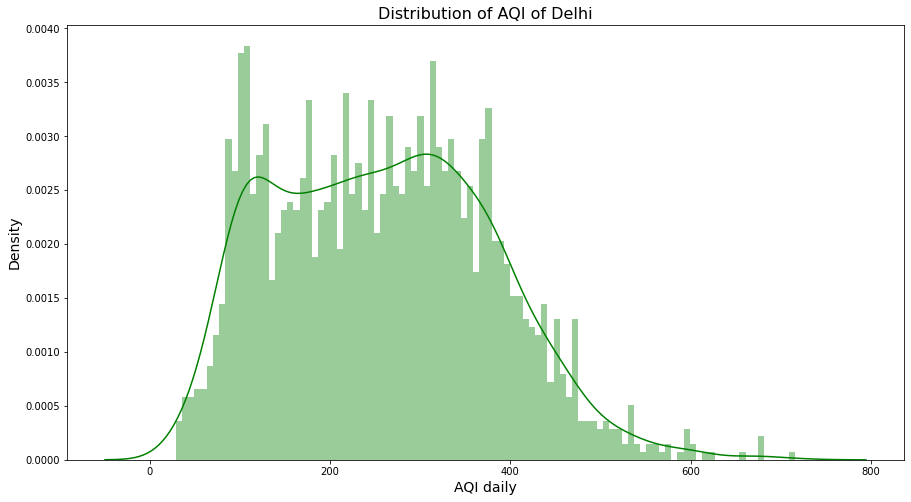

In [42]:
# Created a new figure of 15 X 8 inches
fig = plt.figure(figsize=[15, 8])
sns.distplot(a=AQI_dl['AQI'], bins=100, color='green')
plt.title(label='Distribution of AQI of Delhi', size=16)
plt.xlabel(xlabel='AQI daily', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.show()

<a id=section5></a>
## 6. Time Series analysis and forecasting on AQI for delhi

<a id=section501></a>
### 6.1 **Trend,Seasonality study:** 

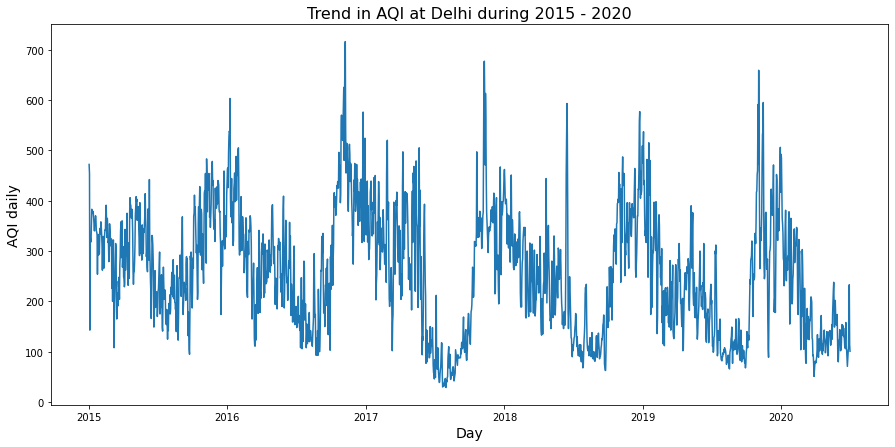

In [43]:
fig = plt.figure(figsize=[15, 7])
sns.lineplot(x='Date', y='AQI', data=AQI_dl)
plt.xlabel(xlabel='Day', size=14)
plt.ylabel(ylabel='AQI daily', size=14)
plt.title(label='Trend in AQI at Delhi during 2015 - 2020', size=16)
plt.show()

In [44]:
AQI_dl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2009 non-null   datetime64[ns]
 1   AQI     2009 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.1 KB


In [45]:
indexed_data =  AQI_dl.set_index(['Date'])

In [46]:
indexed_data.head(5)

,AQI
Date,
2015-01-01,472.00000
2015-01-02,454.00000
2015-01-03,143.00000
2015-01-04,319.00000
2015-01-05,325.00000


<a id=section501></a>
### 6.2 **Decomposition of time series:** 

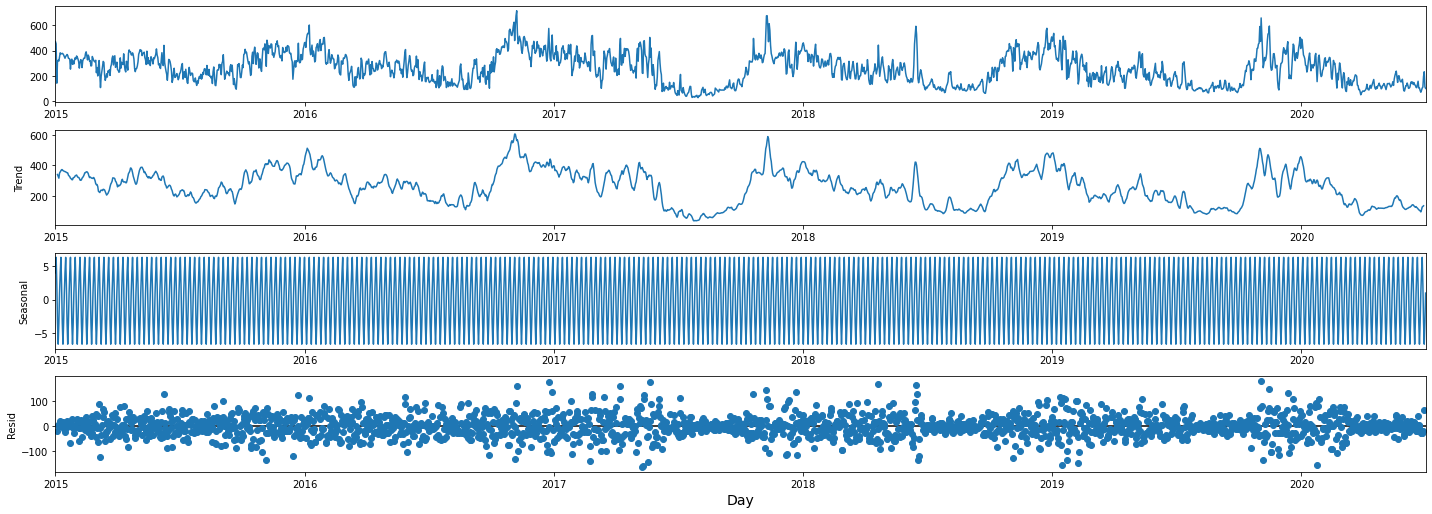

In [47]:
# Set figsize of 15 X 7 inches
rcParams['figure.figsize']  =  [20, 7]

# Decomposed data into respective components: Observed, Trend, Seasonal and Residual
seasonal_decompose(x=indexed_data, model='additive', extrapolate_trend=0).plot()
plt.xlabel(xlabel='Day', size = 14)
plt.show()

In [48]:
def rolling_means(data, title_add = ''):

  # Average rolling mean over 12 months over the entire data set
  roll_mean = data.rolling(window=12).mean()

  # Plotting Rolling Statistics over Observed Data
  roll_std = data.rolling(window=12).std()

  sns.lineplot(x=data.index, y='AQI', data=data)
  sns.lineplot(x=roll_mean.index, y='AQI', data=roll_mean)
  sns.lineplot(x=roll_std.index, y='AQI', data=roll_std)

  plt.legend(labels=['Observed', 'Rolling Mean', 'Rolling Std'], loc='best', prop = {'size': 14})
  plt.xlabel(xlabel='Month', size=14)
  plt.ylabel(ylabel='Number of Passengers', size=14)
  plt.title(label='Rolling Statistics (μ & σ)' + title_add, size=16)

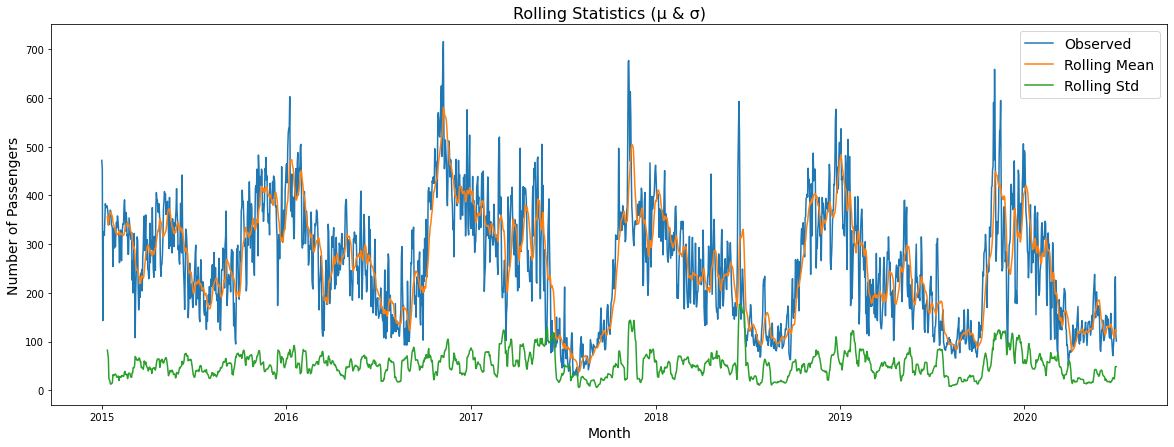

In [49]:
# Plotting Rolling Statistics over Observed Data
figure = plt.figure(figsize=[20, 7])

# Called the function
rolling_means(indexed_data)

# Plot the Visual
plt.show()

<a id=section501></a>
### 6.3 **Stationarity check for source data:** 

In [50]:
def ADFTest(data, test_label='Original'):

  # Saved test results from adfuller function
  dftest = adfuller(data['AQI'], autolag='BIC')

  # Extracted respective values from the saved test results
  df_dict = {'ADF_Test_Statistics': dftest[0], 'p-value': dftest[1], 'Used_Lags': dftest[2], 
              'Number_Of_Observations': dftest[3], 'Critical_Value (1%)': dftest[4]['1%'],
            'Critical_Value (5%)': dftest[4]['5%'], 'Critical_Value (10%)': dftest[4]['10%']}

  # Created dataframe out of the dictionary
  dfoutput = pd.DataFrame(data=df_dict, index=[test_label])

  return dfoutput

In [51]:
ADFTest(indexed_data)

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-4.83883,0.00005,8,2000,-3.43362,-2.86299,-2.56754


**Observation:**

- **p-value** is **lower** than 0.01, 0.05 and 0.1.

- Critical values are **above** to the ADF Test Statistics.

- Hence, we **reject** our **Null Hypothesis** that our time series data is **not stationary**.

In [52]:
# Estimating Autocorrelation Function
ACF = acf(indexed_data, nlags=8)

# Estimating Partial Autocorrelation Function
PACF = pacf(indexed_data, nlags=8)

# Preparing a dataframe out of Correlation Arrays
corrFrame = pd.DataFrame(data = {'ACF': ACF, 'PACF': PACF})

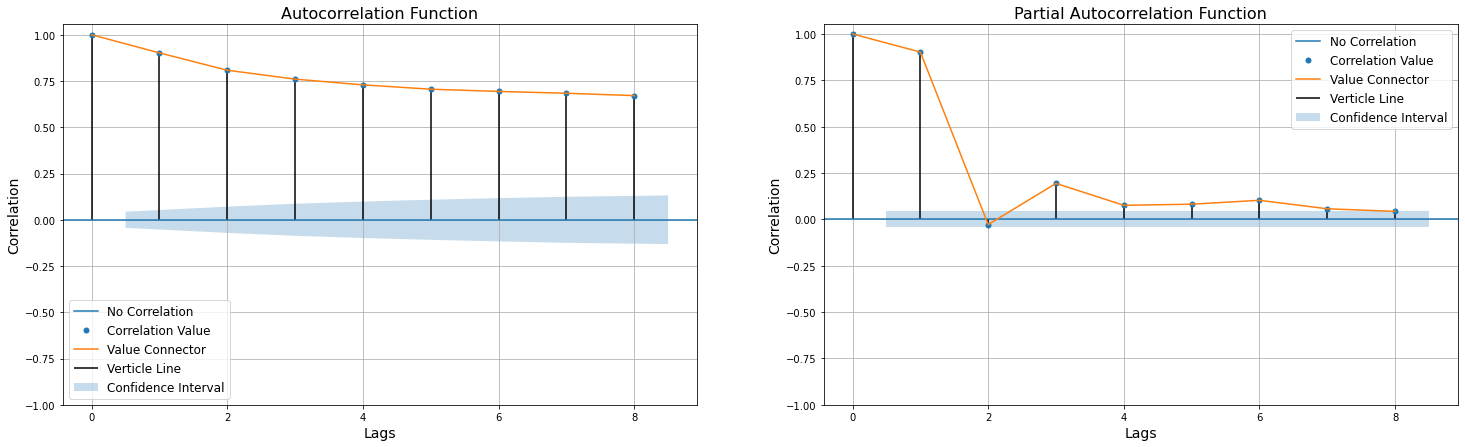

In [53]:
fig, (axes1, axes2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(25, 7))

plot_acf(indexed_data, lags=8, ax=axes1)
sns.lineplot(x=corrFrame.index, y='ACF', data=corrFrame, ax=axes1)
axes1.set_xlabel(xlabel='Lags', size=14)
axes1.set_ylabel(ylabel='Correlation', size=14)
axes1.set_title(label='Autocorrelation Function', size=16)
axes1.legend(labels=['No Correlation', 'Correlation Value', 'Value Connector','Verticle Line', 'Confidence Interval'], prop={'size': 12})
axes1.set_xticks(ticks=range(0, 9, 2))
axes1.set_yticks(ticks=np.linspace(start=-1, stop=1, num=9))
axes1.grid(b=True, which='both')

plot_pacf(indexed_data, lags=8, ax=axes2)
sns.lineplot(x=corrFrame.index, y='PACF', data=corrFrame, ax=axes2)
axes2.set_xlabel(xlabel='Lags', size=14)
axes2.set_ylabel(ylabel='Correlation', size=14)
axes2.set_title(label='Partial Autocorrelation Function', size=16)
axes2.legend(labels=['No Correlation', 'Correlation Value', 'Value Connector', 'Verticle Line', 'Confidence Interval'], prop={'size': 12})
axes2.set_xticks(ticks=range(0, 9, 2))
axes2.set_yticks(ticks=np.linspace(start=-1, stop=1, num=9))
axes2.grid(b=True, which='both')

plt.show()

**Observation:**

- **ACF Graph:** Shows Value Connector is touching the baseline with Lags being close to 78. 

  - Thus, value for $q$ = **78**.

- **PACF Graph:** Shows Value Connector is touching the baseline with Lags being close to 2.

  - Thus, value for $p$ = **2**.

<a id=section501></a>
### 6.4 **Base model using differencing methods:** 

Since the change of **AQI** is not significant between any 2 days, it is reasonable to produce a most basic model in which it uses the **current AQI** as a prediction for the next day.

Thus, we would predict the weather based on an assumption: The **AQI** today depends on the **AQI** yesterday, the same yesterday depends on the day before yesterday, and so on.

In [54]:
aqi_df=indexed_data.copy()

In [55]:
pred_df=aqi_df["AQI"].to_frame().shift(1).rename(columns={"AQI":"AQI_pred"})
actual_df=aqi_df["AQI"].to_frame().rename(columns={"AQI":"AQI_actual"})

In [56]:
one_step_df=pd.concat([actual_df,pred_df],axis=1)

In [57]:
one_step_df=one_step_df[1:]
one_step_df.head(5)

,AQI_actual,AQI_pred
Date,,
2015-01-02,454.00000,472.00000
2015-01-03,143.00000,454.00000
2015-01-04,319.00000,143.00000
2015-01-05,325.00000,319.00000
2015-01-06,318.00000,325.00000


In [58]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
aqi_pred_err = sqrt(MSE(one_step_df.AQI_actual,one_step_df.AQI_pred))
print("RMSE is",aqi_pred_err)

RMSE is 52.78610321441697


In [59]:
one_step_df.AQI_actual.describe()

count   2008.00000
mean     258.51519
std      119.83294
min       29.00000
25%      159.00000
50%      257.00000
75%      345.00000
max      716.00000
Name: AQI_actual, dtype: float64

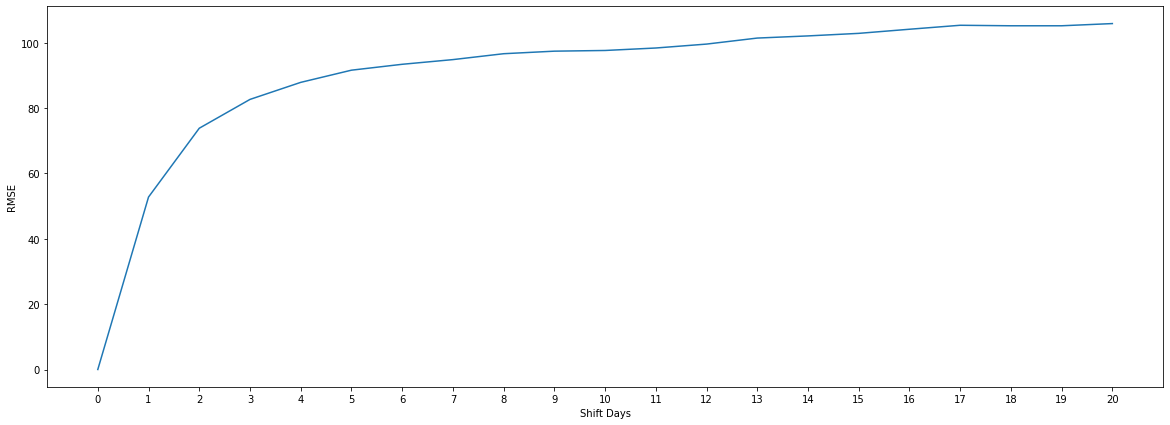

In [60]:
aqi_pred_err=list()
shift=list()
for i in range(0,21,1):
  pred_df=aqi_df["AQI"].to_frame().shift(i).rename(columns={"AQI":"AQI_pred"})
  actual_df=aqi_df["AQI"].to_frame().rename(columns={"AQI":"AQI_actual"})
  one_step_df=pd.concat([actual_df,pred_df],axis=1)
  one_step_df=one_step_df[i:]
  shift.append(i)
  aqi_pred_err.append(sqrt(MSE(one_step_df.AQI_actual,one_step_df.AQI_pred)))
plt.plot(shift, aqi_pred_err)
plt.xticks(np.arange(0,21,1))
plt.xlabel("Shift Days")
plt.ylabel("RMSE")
plt.show()

In [61]:
aqi_df_diff = aqi_df.diff(periods = 1).dropna()
aqi_df_diff.shape

(2008, 1)

In [62]:
ADFTest(aqi_df_diff)

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-21.86976,0.00000,8,1999,-3.43363,-2.86299,-2.56754


In [63]:
# Estimating Autocorrelation Function
ACF = acf(aqi_df_diff, nlags=8)

# Estimating Partial Autocorrelation Function
PACF = pacf(aqi_df_diff, nlags=8)

# Preparing a dataframe out of Correlation Arrays
corrFrame = pd.DataFrame(data = {'ACF': ACF, 'PACF': PACF})

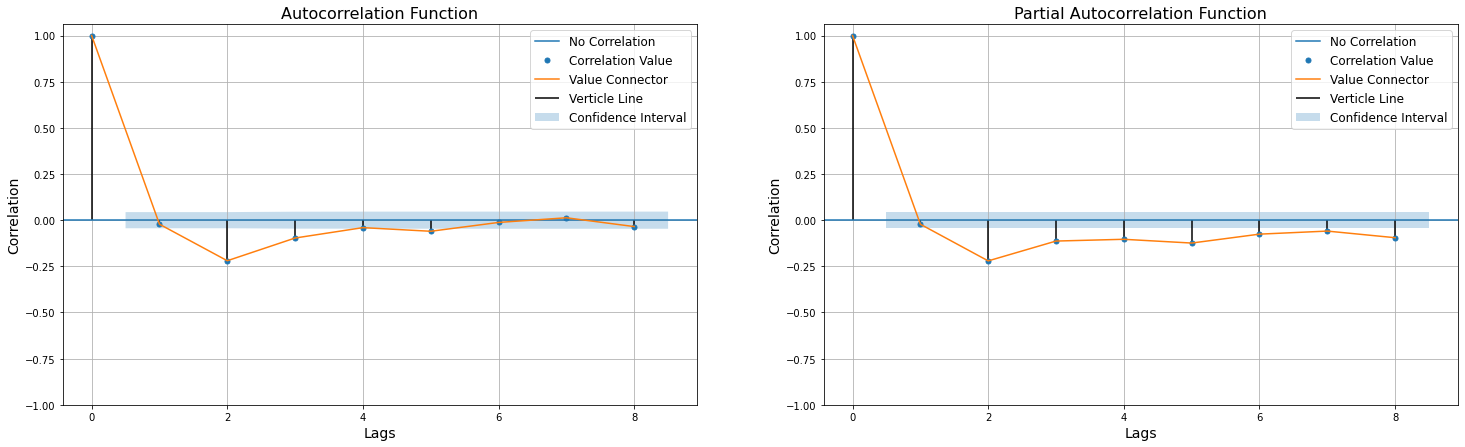

In [64]:
fig, (axes1, axes2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(25, 7))

plot_acf(aqi_df_diff, lags=8, ax=axes1)
sns.lineplot(x=corrFrame.index, y='ACF', data=corrFrame, ax=axes1)
axes1.set_xlabel(xlabel='Lags', size=14)
axes1.set_ylabel(ylabel='Correlation', size=14)
axes1.set_title(label='Autocorrelation Function', size=16)
axes1.legend(labels=['No Correlation', 'Correlation Value', 'Value Connector','Verticle Line', 'Confidence Interval'], prop={'size': 12})
axes1.set_xticks(ticks=range(0, 9, 2))
axes1.set_yticks(ticks=np.linspace(start=-1, stop=1, num=9))
axes1.grid(b=True, which='both')

plot_pacf(aqi_df_diff, lags=8, ax=axes2)
sns.lineplot(x=corrFrame.index, y='PACF', data=corrFrame, ax=axes2)
axes2.set_xlabel(xlabel='Lags', size=14)
axes2.set_ylabel(ylabel='Correlation', size=14)
axes2.set_title(label='Partial Autocorrelation Function', size=16)
axes2.legend(labels=['No Correlation', 'Correlation Value', 'Value Connector', 'Verticle Line', 'Confidence Interval'], prop={'size': 12})
axes2.set_xticks(ticks=range(0, 9, 2))
axes2.set_yticks(ticks=np.linspace(start=-1, stop=1, num=9))
axes2.grid(b=True, which='both')

plt.show()

<a id=section501></a>
### 6.5 **Model using SARIMAX methods:** 

In [65]:
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
#print(pdq)
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
#print(seasonal_pdq)
print("Example combination of Seasonal ARIMA parameters")
print('SARIMAX:{} X {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} X {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} X {}'.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX:{} X {}'.format(pdq[3],seasonal_pdq[4]))

Example combination of Seasonal ARIMA parameters
SARIMAX:(0, 0, 1) X (0, 0, 1, 12)
SARIMAX:(0, 0, 1) X (0, 1, 0, 12)
SARIMAX:(0, 1, 0) X (0, 1, 0, 12)
SARIMAX:(0, 1, 1) X (1, 0, 0, 12)


In [ ]:
ans_aic=[]
ans_bic=[]
for comb in pdq:
  for combs in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(aqi_df, order = comb, seasonal_order= combs, enforce_stationarity=False, enforce_invertibility=False)
      output = mod.fit()
      ans_aic.append([comb,combs,output.aic])
      ans_bic.append([comb,combs,output.bic])
      print('ARIMA {} x {}12 : AIC Calculated = {}'.format(comb,combs,output.aic))
      print('ARIMA {} x {}12 : BIC Calculated = {}'.format(comb,combs,output.bic))
    except:
      continue
ans_aic_df=pd.DataFrame(ans_aic,columns=['pdq','seasonal_pdq','aic'])
ans_bic_df=pd.DataFrame(ans_bic,columns=['pdq','seasonal_pdq','bic'])

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 28399.813020527512
ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated = 28405.417915008322
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 26586.274545303706
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated = 26597.472346217448
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 24034.112907118088
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated = 24039.71180757496
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 23607.09057823233
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated = 23618.27631880802
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 23977.573139389446
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated = 23988.77194205628
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 23719.22899647552
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated = 23736.025697846133
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 23629.99047292171
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated = 23641.17722130795

In [ ]:
ans_aic_df.loc[ans_aic_df['aic'].idxmin()]

pdq                 (1, 1, 1)
seasonal_pdq    (1, 1, 1, 12)
aic               21209.92143
Name: 63, dtype: object

In [ ]:
ans_bic_df.loc[ans_bic_df['bic'].idxmin()]

pdq                 (1, 1, 1)
seasonal_pdq    (0, 1, 1, 12)
bic               21234.81928
Name: 59, dtype: object

In [66]:
aqi_df.shape

(2009, 1)

In [67]:
aqi_df[:'2019-07-01'].shape

(1643, 1)

In [77]:
ARIMA_model = sm.tsa.statespace.SARIMAX(aqi_df, order = (1,1,1), seasonal_order= (1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
output = ARIMA_model.fit()

In [71]:
#ARIMA_model1 = sm.tsa.statespace.SARIMAX(aqi_df[:'2019-07-01'], order = (1,1,1), seasonal_order= (0,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
#output1 = ARIMA_model1.fit()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6945      0.022     31.420      0.000       0.651       0.738
ma.L1         -0.9152      0.013    -72.489      0.000      -0.940      -0.890
ar.S.L12       0.0520      0.018      2.834      0.005       0.016       0.088
ma.S.L12      -1.0000     11.652     -0.086      0.932     -23.838      21.838
sigma2      2513.4776   2.93e+04      0.086      0.932   -5.49e+04    5.99e+04


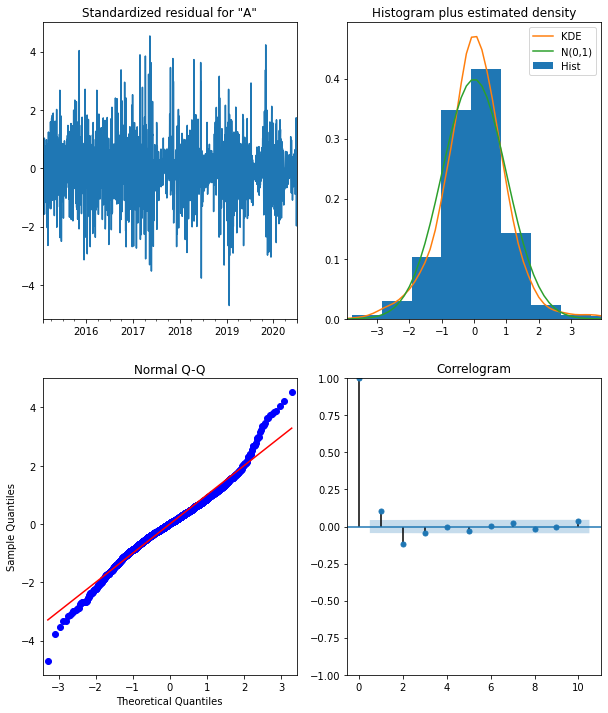

In [78]:
print(output.summary().tables[1])
output.plot_diagnostics(figsize=(10,12))
plt.show()

In this case, our model diagnostics suggest that the model residuals are normally distributed based on the following:
- In the top-right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
- The residuals over time (top left plot) do not display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

**Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values**.

<a id=section501></a>
### 6.6 **Prediction on validation set:** 

In [79]:
pred = output.get_prediction(start=pd.to_datetime('2019-07-01'),dynamic=False)
pred_ci = pred.conf_int()

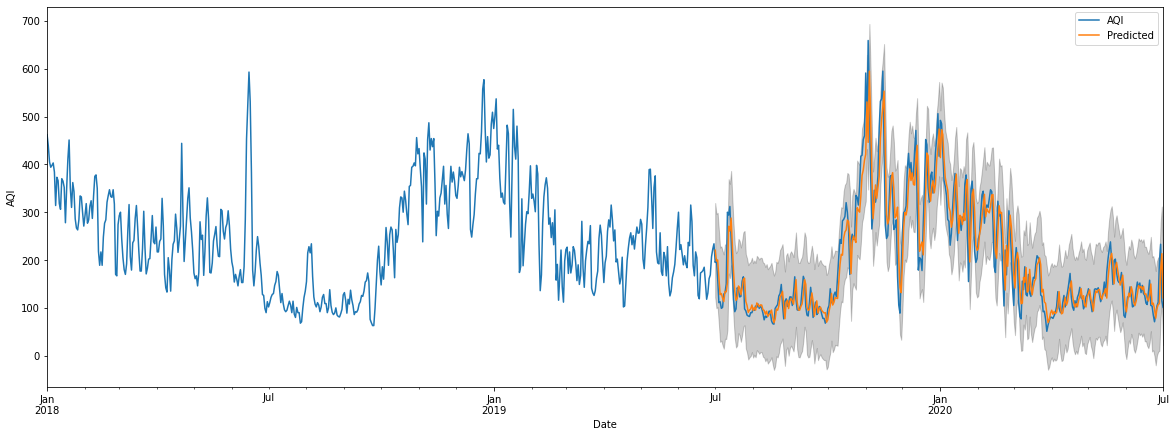

In [80]:
ax = aqi_df['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='Predicted')

ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha =0.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
#plt.ylim()
plt.legend()
plt.show()

In [81]:
pred.predicted_mean.tail(10)

2020-06-22   107.32631
2020-06-23   109.90036
2020-06-24    97.58335
2020-06-25    78.55306
2020-06-26    99.05821
2020-06-27   106.82054
2020-06-28   108.91752
2020-06-29   179.24281
2020-06-30   213.35312
2020-07-01   121.02571
Freq: D, Name: predicted_mean, dtype: float64

In [82]:
y_predicted=pred.predicted_mean
y_truth=aqi_df['2019-07-01':]
print(y_predicted.shape)
print(y_truth.shape)
rmse = sqrt(MSE(y_truth,y_predicted).mean())
print('RMSE is {}'.format(round(rmse,2)))

(367,)
(367, 1)
RMSE is 44.88


<a id=section501></a>
### 6.7 **Forecasting for next 100 days:** 

In [83]:
for_cast = output.forecast(steps=100)

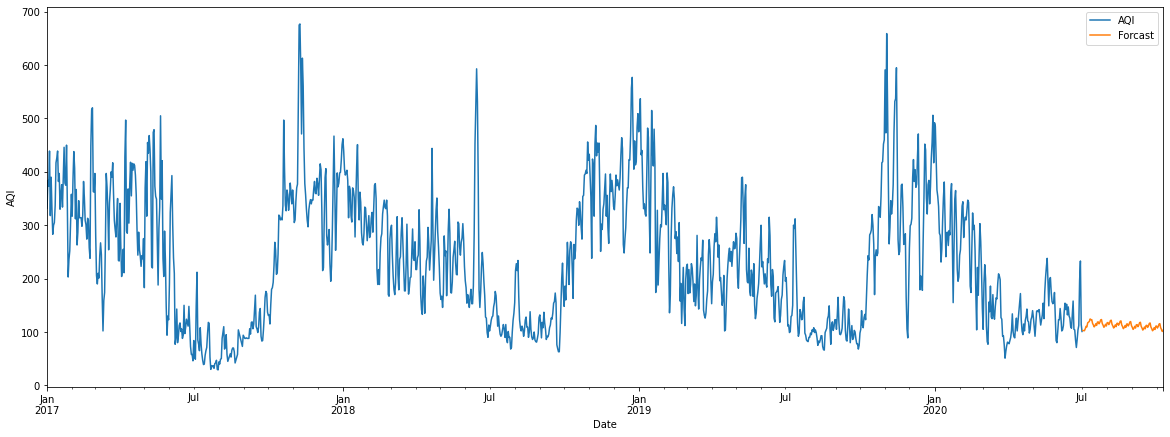

In [84]:
ax = aqi_df['2017':].plot(label='observed')
for_cast.plot(ax=ax,label='Forcast')

#ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha =0.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
#plt.ylim()
plt.legend()
plt.show()

In [85]:
forc = output.get_forecast(steps=100)
forc_ci = forc.conf_int()

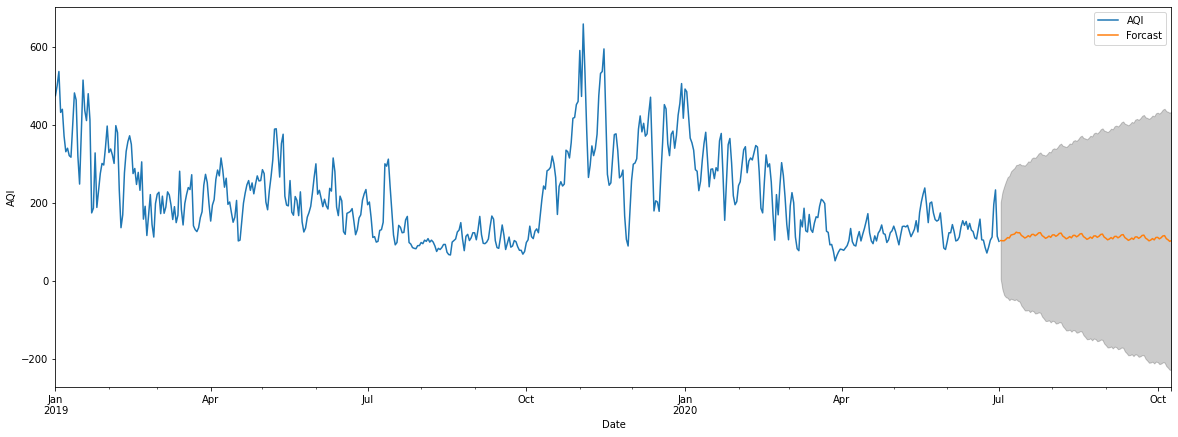

In [86]:
ax = aqi_df['2019':].plot(label='observed')
forc.predicted_mean.plot(ax=ax,label='Forcast')

ax.fill_between(forc_ci.index,forc_ci.iloc[:,0],forc_ci.iloc[:,1],color='k',alpha =0.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
#plt.ylim()
plt.legend()
plt.show()

In [87]:
forc.predicted_mean.head(10)

2020-07-02   102.87578
2020-07-03   102.53329
2020-07-04   102.47564
2020-07-05   106.10531
2020-07-06   110.59787
2020-07-07   109.54478
2020-07-08   117.14889
2020-07-09   118.46849
2020-07-10   119.65405
2020-07-11   124.50040
Freq: D, Name: predicted_mean, dtype: float64

<a id=section501></a>
### 6.8 **Analysis of the forecasted data vs actual data (recorded separately):** 

In [88]:
file4="https://raw.githubusercontent.com/pathakchiranjit/Time_Series/main/Data_set/aqi.csv"
forcast_data = pd.read_csv(file4)  # (encoding='ISO-8859-1',sep="|") not required here
forcast_data.head(3)

,Date,AQI_list
0,7/2/2020,167
1,7/10/2020,72
2,7/15/2020,106


In [89]:
forcast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      16 non-null     object
 1   AQI_list  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [90]:
import datetime
forcast_data['Date'] = pd.to_datetime(forcast_data['Date'])
forcast_data.astype({'AQI_list': 'float'})
forcast_data.head(3)

,Date,AQI_list
0,2020-07-02,167
1,2020-07-10,72
2,2020-07-15,106


In [91]:
forcast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      16 non-null     datetime64[ns]
 1   AQI_list  16 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 384.0 bytes


In [92]:
forcast_data.set_index('Date')

,AQI_list
Date,
2020-07-02,167
2020-07-10,72
2020-07-15,106
2020-07-20,107
2020-07-25,79
2020-08-02,84
2020-08-10,65
2020-08-15,69
2020-08-20,81


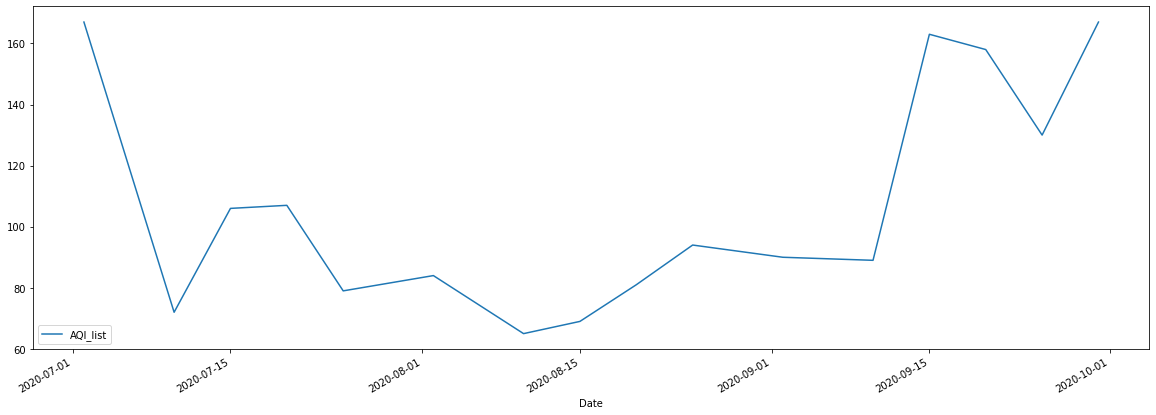

In [93]:
forcast_data.plot(x= 'Date', y='AQI_list',kind='line')

#ax.fill_between(forc_ci.index,forc_ci.iloc[:,0],forc_ci.iloc[:,1],color='k',alpha =0.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
#plt.ylim()
plt.legend()
plt.show()

In [94]:
for_cast.head(3)

2020-07-02   102.87578
2020-07-03   102.53329
2020-07-04   102.47564
Freq: D, Name: predicted_mean, dtype: float64

In [95]:
forcast_df=pd.DataFrame(for_cast)

In [96]:
forcast_df.columns=['AQI_forc']
forcast_df.head(3)

,AQI_forc
2020-07-02,102.87578
2020-07-03,102.53329
2020-07-04,102.47564


In [97]:
forcast_df.reset_index(inplace=True)
forcast_df.columns=('Date','AQI_forc')
forcast_df.head(3)

,Date,AQI_forc
0,2020-07-02,102.87578
1,2020-07-03,102.53329
2,2020-07-04,102.47564


In [98]:
forcast_df.set_index(['Date'],inplace=True)
forcast_df.head(3)

,AQI_forc
Date,
2020-07-02,102.87578
2020-07-03,102.53329
2020-07-04,102.47564


In [99]:
forcast_data.set_index(['Date'],inplace=True)
forcast_data.head(3)

,AQI_list
Date,
2020-07-02,167
2020-07-10,72
2020-07-15,106


In [100]:
df3 = pd.merge(forcast_data, forcast_df, left_index=True, right_index=True)
df3.shape

(16, 2)

In [101]:
df3.head(3)

,AQI_list,AQI_forc
Date,,
2020-07-02,167,102.87578
2020-07-10,72,119.65405
2020-07-15,106,113.22369


In [102]:
df3.reset_index(inplace=True)

In [103]:
df3.columns=('Date','AQI_Actual','AQI_forcasted')

In [104]:
df3.head(3)

,Date,AQI_Actual,AQI_forcasted
0,2020-07-02,167,102.87578
1,2020-07-10,72,119.65405
2,2020-07-15,106,113.22369


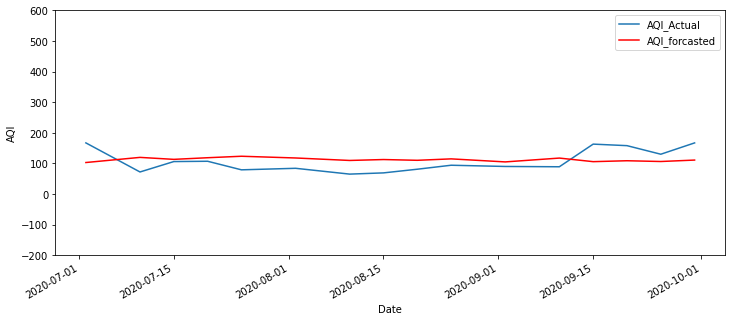

In [105]:
plt.rcParams["figure.figsize"] = (12,5)
ax = plt.gca()
df3.plot(kind='line',x='Date',y='AQI_Actual',ax=ax)
df3.plot(kind='line',x='Date',y='AQI_forcasted', color='red', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.ylim(-200,600)
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
aqi_err = sqrt(MSE(df3.AQI_Actual,df3.AQI_forcasted))
print("RMSE is",aqi_err)

RMSE is 39.769219895039754


<a id=section501></a>
### 6.9 **Modeling with ARIMA algorithm:** 

In [107]:
aqi_df_diff.shape

(2008, 1)

In [108]:
indexed_data = aqi_df_diff.copy()

In [109]:
indexed_data.shape

(2008, 1)

In [110]:
train = indexed_data[0 : len(indexed_data) - 500]

test = indexed_data[len(indexed_data) - 500 : ]

print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (1508, 1)
Test Shape: (500, 1)


In [111]:
def actual_vs_predicted(actual_data, predicted_data, title):

  # Plotting Actual Data
  sns.lineplot(x=actual_data.index, y=actual_data.values.flatten())
  sns.scatterplot(x=actual_data.index, y=actual_data.values.flatten())

  # Plotting Predicted Data
  sns.lineplot(x=predicted_data.index, y=predicted_data.values)
  sns.scatterplot(x=predicted_data.index, y=predicted_data.values)

  # Estimating RSS
  rss_value = np.sum(np.square(actual_data.values - predicted_data.values))

  # Modifying formatting
  plt.xlabel(xlabel='Month', size=14)
  plt.ylabel(ylabel='Number of Passengers', size=14)
  plt.title(label=title +' [RSS = {:.4f}]'.format(rss_value), size=16)
  plt.legend(labels=['Actual', 'Predicted'])
  plt.grid(b=True, which='both')

<a id=section501></a>
### 6.9.1 **Auto Regressive Model:** 

- We will use ARIMA model but **without passing** the $q$ value inside order of the function.

- The **differencing** (I) that we are using is **1**.

- Let's train the model and predict the results.

In [112]:
model = ARIMA(train, order=(1, 1, 0))
model_fit_ar = model.fit()
predicted = model_fit_ar.predict(start=len(train), end=len(train) + len(test) - 1)
print('-----------------------------------------------------------------------')
print('Coefficients:')
print(model_fit_ar.params)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Coefficients:
ar.L1      -0.40957
sigma2   5211.65557
dtype: float64
-----------------------------------------------------------------------


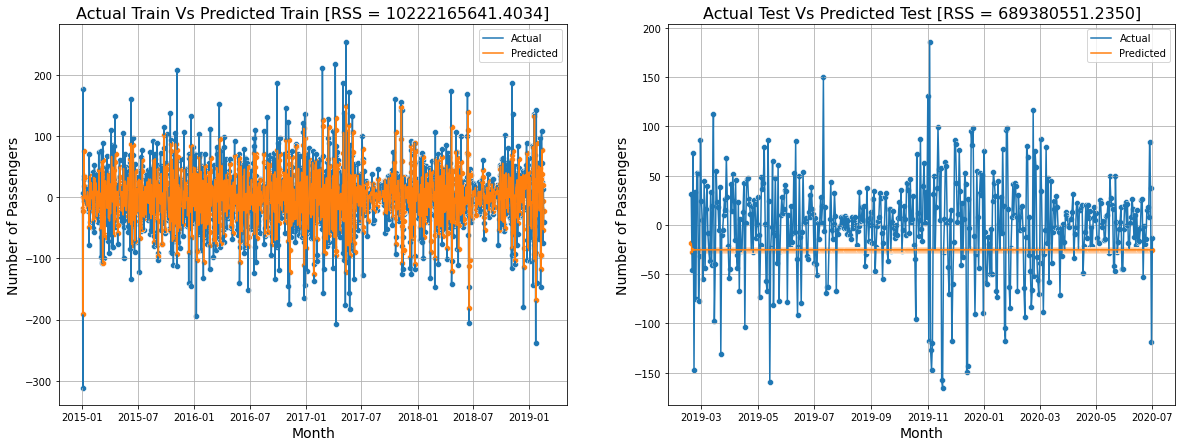

In [113]:
figure = plt.figure(figsize=[20, 7])

plt.subplot(1, 2, 1)
actual_vs_predicted(train, model_fit_ar.fittedvalues, title='Actual Train Vs Predicted Train')

plt.subplot(1, 2, 2)
actual_vs_predicted(test, predicted, title='Actual Test Vs Predicted Test')

plt.show()

**Observation:**

- Validation performance is not good.

<a id=section501></a>
### 6.9.2 **Moving Average Model:** 

- We will use ARIMA model but **without passing** the $p$ value inside order of the function.

- The **differencing** (I) that we are using is **1**.

- Let's train the model and predict the results.

In [114]:
model = ARIMA(train, order=(0, 1, 1))
model_fit_ma = model.fit()
predicted = model_fit_ma.predict(start=len(train), end=len(train) + len(test) - 1)
print('-----------------------------------------------------------------------')
print('Coefficients:')
print(model_fit_ma.params)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Coefficients:
ma.L1      -0.99927
sigma2   3008.50955
dtype: float64
-----------------------------------------------------------------------


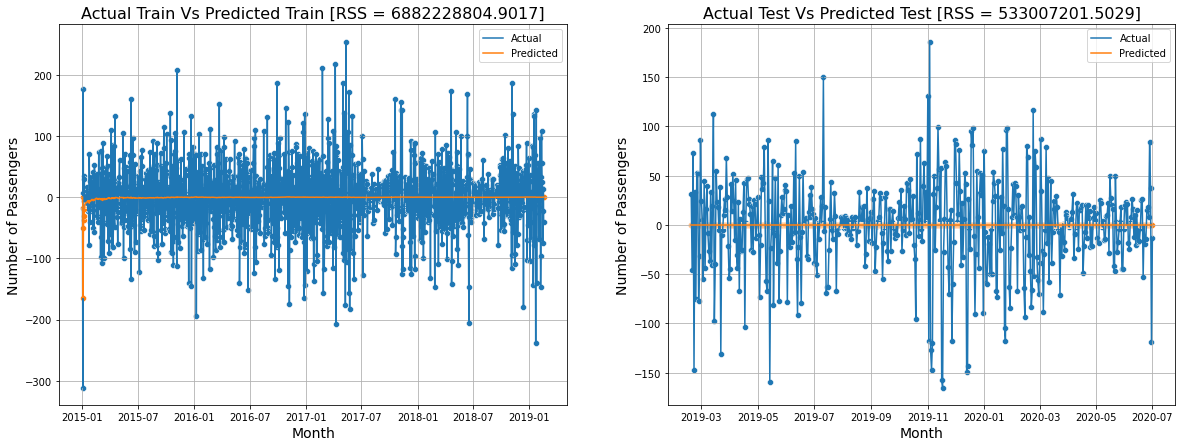

In [115]:
figure = plt.figure(figsize=[20, 7])

plt.subplot(1, 2, 1)
actual_vs_predicted(train, model_fit_ma.fittedvalues, title='Actual Train Vs Predicted Train')

plt.subplot(1, 2, 2)
actual_vs_predicted(test, predicted, title='Actual Test Vs Predicted Test')

plt.show()

**Observation:**

- Model is not satisfactory.

<a id=section501></a>
### 6.9.3 **Auto Regressive Integrated Moving Average Model:** 

- We will use ARIMA model and pass the p, d and q values identified from earlier analysis.

- **Note:** Here $p = 1, d = 1, q = 1$

- Let's train the model and predict the results.

<a name = Section734></a>
dsadsad

In [116]:
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
predicted = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
print('-----------------------------------------------------------------------')
print('Coefficients:')
print('%s' % model_fit.params)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Coefficients:
ar.L1      -0.03973
ma.L1      -0.99997
sigma2   3000.78662
dtype: float64
-----------------------------------------------------------------------


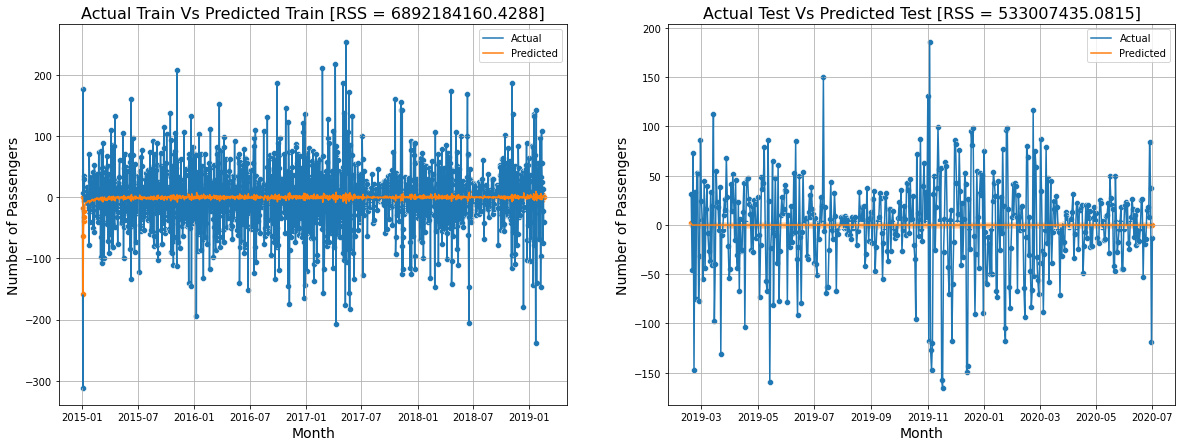

In [117]:
figure = plt.figure(figsize=[20, 7])

plt.subplot(1, 2, 1)
actual_vs_predicted(train, model_fit.fittedvalues, title='Actual Train Vs Predicted Train')

plt.subplot(1, 2, 2)
actual_vs_predicted(test, predicted, title='Actual Test Vs Predicted Test')

plt.show()

<a id=section6></a>
## 7. Conclusion

- SARIMAX seems best compared to ARIMA model.